In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import MinMaxScaler

## Cargando datos

&lt;matplotlib.axes._subplots.AxesSubplot at 0x16b065cc088&gt;

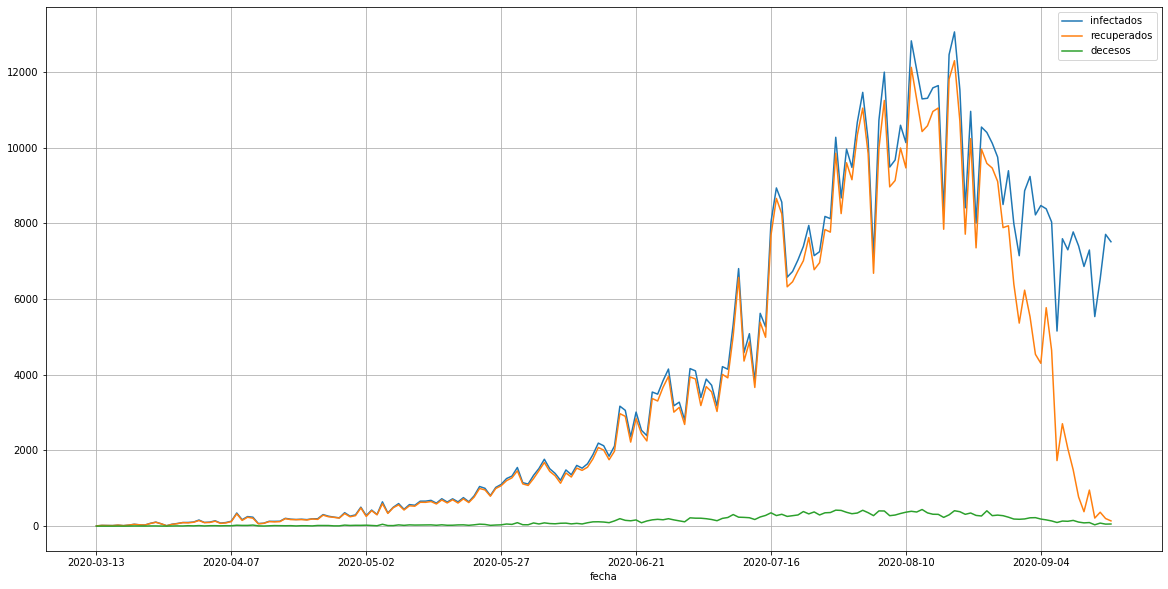

In [2]:
df = pd.read_csv("seird_constantes_dia_colombia_dependencia_cruzada_emulador.csv")
df.plot(x='fecha', 
        y=['infectados', 'recuperados', 'decesos'], 
        kind='line', 
        figsize=(20, 10), 
        grid=True,
        legend=True,
        loglog=False
        )

In [3]:
cols = ['fecha', 'cantidad_mayores_65', 'ipm', 
        'poblacion_total', 'personas_km2', 
        'edad_promedio', 'promedio_morbilidades']
df = df.drop(columns=cols)
df.columns

Index([&#39;susceptibles&#39;, &#39;expuestos&#39;, &#39;infectados&#39;, &#39;recuperados&#39;, &#39;decesos&#39;,
       &#39;susceptibles_t_1&#39;, &#39;susceptibles_t_2&#39;, &#39;susceptibles_t_3&#39;,
       &#39;susceptibles_t_4&#39;, &#39;susceptibles_t_5&#39;, &#39;susceptibles_t_6&#39;,
       &#39;susceptibles_t_7&#39;, &#39;expuestos_t_1&#39;, &#39;expuestos_t_2&#39;, &#39;expuestos_t_3&#39;,
       &#39;expuestos_t_4&#39;, &#39;expuestos_t_5&#39;, &#39;expuestos_t_6&#39;, &#39;expuestos_t_7&#39;,
       &#39;infectados_t_1&#39;, &#39;infectados_t_2&#39;, &#39;infectados_t_3&#39;, &#39;infectados_t_4&#39;,
       &#39;infectados_t_5&#39;, &#39;infectados_t_6&#39;, &#39;infectados_t_7&#39;, &#39;recuperados_t_1&#39;,
       &#39;recuperados_t_2&#39;, &#39;recuperados_t_3&#39;, &#39;recuperados_t_4&#39;,
       &#39;recuperados_t_5&#39;, &#39;recuperados_t_6&#39;, &#39;recuperados_t_7&#39;, &#39;decesos_t_1&#39;,
       &#39;decesos_t_2&#39;, &#39;decesos_t_3&#39;, &#39;deces

In [4]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)
df.loc[:,:] = scaled_values
df.head(10)

,susceptibles,expuestos,infectados,recuperados,decesos,susceptibles_t_1,susceptibles_t_2,susceptibles_t_3,susceptibles_t_4,susceptibles_t_5,...,recuperados_t_5,recuperados_t_6,recuperados_t_7,decesos_t_1,decesos_t_2,decesos_t_3,decesos_t_4,decesos_t_5,decesos_t_6,decesos_t_7
0,1.000000,0.002501,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.999916,0.008039,0.000996,0.001058,0.000000,0.999938,0.999950,0.999982,0.999990,0.999999,...,0.000163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.999774,0.013964,0.000843,0.000895,0.000000,0.999853,0.999887,0.999932,0.999972,0.999989,...,0.000000,0.000163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.999577,0.004201,0.000690,0.000651,0.002283,0.999710,0.999802,0.999869,0.999921,0.999971,...,0.000488,0.000000,0.000163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.999473,0.001603,0.001532,0.001627,0.000000,0.999512,0.999658,0.999783,0.999858,0.999920,...,0.000407,0.000488,0.000000,0.002283,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.999388,0.012167,0.000536,0.000570,0.000000,0.999407,0.999458,0.999638,0.999771,0.999856,...,0.000407,0.000407,0.000488,0.000000,0.002283,0.000000,0.000000,0.000000,0.000000,0.0
6,0.999210,0.010079,0.001609,0.001709,0.000000,0.999321,0.999352,0.999437,0.999625,0.999769,...,0.001464,0.000407,0.000407,0.000000,0.000000,0.002283,0.000000,0.000000,0.000000,0.0
7,0.999045,0.003521,0.003295,0.003255,0.006849,0.999142,0.999266,0.999330,0.999423,0.999622,...,0.001301,0.001464,0.000407,0.000000,0.000000,0.000000,0.002283,0.000000,0.000000,0.0
8,0.998931,0.000971,0.002222,0.002278,0.002283,0.998976,0.999085,0.999244,0.999315,0.999418,...,0.001057,0.001301,0.001464,0.006849,0.000000,0.000000,0.000000,0.002283,0.000000,0.0
9,0.998848,0.014280,0.001839,0.001871,0.002283,0.998861,0.998918,0.999062,0.999228,0.999309,...,0.002033,0.001057,0.001301,0.002283,0.006849,0.000000,0.000000,0.000000,0.002283,0.0


In [5]:
def gradientBoostingRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = GradientBoostingRegressor(
                                    n_estimators=100,
                                    learning_rate=0.1,
                                    criterion="mse",
                                    warm_start=False
                                    )
    # Cross validation with 100 iterations to get smoother mean test and train score curves, each time with 20% data randomly selected as a validation set.
    # cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    # plot_learning_curve(model, X_train, y_train, cv=cv, n_jobs=4)
    # plot_importance(model, X)
    
    # train and predict
    model.fit(X_train, y_train)
    predicts = model.predict(X_test)
    # print("Parameters:", model.get_params())

    # metrics
    metrics = {
        'mae': mean_absolute_error(y_test, predicts),
        'mse': mean_squared_error(y_test, predicts),
        'rmse': np.sqrt(mean_squared_error(y_test, predicts)),
        'mape': np.mean(np.abs((y_test,predicts))*100),
        'r2': model.score(X_test, y_test) # r2_score(y_test, predicts))
    }

    return model, metrics

In [6]:
def randomForestRegressor(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(
                                n_estimators=100, 
                                criterion="mse",
                                max_depth=100,
                                min_samples_leaf=2,
                                bootstrap=True,
                                warm_start=False
                                )
    # Cross validation with 100 iterations to get smoother mean test and train score curves, each time with 20% data randomly selected as a validation set.
    # cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
    # plot_learning_curve(model, X_train, y_train, cv=cv, n_jobs=4)
    # plot_importance(model, X)
    
    # train and predict
    model.fit(X_train, y_train)
    predicts = model.predict(X_test)
    # print("Parameters:", model.get_params())

    # metrics
    metrics = {
        'mae': mean_absolute_error(y_test, predicts),
        'mse': mean_squared_error(y_test, predicts),
        'rmse': np.sqrt(mean_squared_error(y_test, predicts)),
        'mape': np.mean(np.abs((y_test,predicts))*100),
        'r2': model.score(X_test, y_test) # r2_score(y_test, predicts))
    }

    return model, metrics

In [7]:
def plot_importance(model, X):
    plt.barh(range(len(model.feature_importances_)), model.feature_importances_, align='center')
    x = X.columns
    x_pos = [i for i, _ in enumerate(x)]
    plt.yticks(x_pos, x)
    plt.xlabel("importance")
    plt.ylabel("variable")
    plt.title("feature importances")
    plt.show()

In [8]:
def plot_learning_curve(estimator, X, y, title='learning curve', ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

### Susceptibles

In [9]:
X_s = df[[
    'infectados_t_1',
    'infectados_t_4',
    'recuperados_t_1',
    'decesos_t_1'
]]
y_s = df['susceptibles']

In [10]:
res_gb_s, metrics_gb_s = gradientBoostingRegressor(X_s, y_s)
metrics_gb_s

{&#39;mae&#39;: 0.029477566594386856,
 &#39;mse&#39;: 0.003396740975493407,
 &#39;rmse&#39;: 0.05828156634385702,
 &#39;mape&#39;: 71.55451335905126,
 &#39;r2&#39;: 0.9661689078067166}

In [11]:
res_rf_s, metrics_rf_s = randomForestRegressor(X_s, y_s)
metrics_rf_s

{&#39;mae&#39;: 0.03712978558860559,
 &#39;mse&#39;: 0.007366590717504157,
 &#39;rmse&#39;: 0.0858288454862592,
 &#39;mape&#39;: 71.58119071992019,
 &#39;r2&#39;: 0.9266297278738285}

### Expuestos

In [12]:
X_e = df[[
    'susceptibles_t_1',
    'susceptibles_t_2',
    'susceptibles_t_4',
    'susceptibles_t_6',
    'susceptibles_t_7',
    'infectados_t_1',
    'infectados_t_2',
    'infectados_t_3',
    'infectados_t_4',
    'recuperados_t_1',
    'recuperados_t_3',
    'recuperados_t_7',
    'decesos_t_1',
    'decesos_t_2',
    'decesos_t_3',
    'decesos_t_7'
    ''
]]
y_e = df['expuestos']

In [13]:
res_gb_e, metrics_gb_e = gradientBoostingRegressor(X_e, y_e)
metrics_gb_e

{&#39;mae&#39;: 0.035550600393526505,
 &#39;mse&#39;: 0.003065674426319405,
 &#39;rmse&#39;: 0.05536853281711016,
 &#39;mape&#39;: 38.74850311025139,
 &#39;r2&#39;: 0.968304864751769}

In [14]:
res_rf_e, metrics_rf_e = randomForestRegressor(X_e, y_e)
metrics_rf_e

{&#39;mae&#39;: 0.03362817679429967,
 &#39;mse&#39;: 0.002895445203318025,
 &#39;rmse&#39;: 0.05380934122731875,
 &#39;mape&#39;: 38.85594791766128,
 &#39;r2&#39;: 0.970064816232562}

### Infectados

In [15]:
X_i = df[[
    "susceptibles_t_1",
    "susceptibles_t_2",
    "susceptibles_t_3",
    "susceptibles_t_4",
    "susceptibles_t_5",
    "susceptibles_t_6",
    "expuestos_t_1",
    "expuestos_t_4",
    "expuestos_t_6",
    "expuestos_t_7",
    "recuperados_t_3",
    "recuperados_t_4",
    "recuperados_t_6",
    "recuperados_t_7",
    "decesos_t_1",
    "decesos_t_7"
]]
y_i = df['infectados']

In [16]:
res_gb_i, metrics_gb_i = gradientBoostingRegressor(X_i, y_i)
metrics_gb_i

{&#39;mae&#39;: 0.04651585729316051,
 &#39;mse&#39;: 0.006179436887430109,
 &#39;rmse&#39;: 0.0786093943967902,
 &#39;mape&#39;: 31.65403129018131,
 &#39;r2&#39;: 0.9460652566046965}

In [17]:
res_rf_i, metrics_rf_i = randomForestRegressor(X_i, y_i)
metrics_rf_i

{&#39;mae&#39;: 0.04416619672039603,
 &#39;mse&#39;: 0.004946589285265599,
 &#39;rmse&#39;: 0.07033199332640586,
 &#39;mape&#39;: 31.53846844135494,
 &#39;r2&#39;: 0.956825673820627}

### Recuperados

In [18]:
X_r = df[[
    'susceptibles_t_2',
    'susceptibles_t_3',
    'susceptibles_t_5',
    'susceptibles_t_6',
    'susceptibles_t_7',
    'expuestos_t_1',
    'expuestos_t_7',
    'infectados_t_2',
    'infectados_t_6',
    'infectados_t_7',
    'decesos_t_3',
    'decesos_t_6'
]]
y_r = df['recuperados']

In [19]:
res_gb_r, metrics_gb_r = gradientBoostingRegressor(X_r, y_r)
metrics_gb_r

{&#39;mae&#39;: 0.04209309448240823,
 &#39;mse&#39;: 0.005328033184618042,
 &#39;rmse&#39;: 0.07299337767645803,
 &#39;mape&#39;: 28.85153596286844,
 &#39;r2&#39;: 0.9532761133115042}

In [20]:
res_rf_r, metrics_rf_r = randomForestRegressor(X_r, y_r)
metrics_rf_r

{&#39;mae&#39;: 0.043917843853599266,
 &#39;mse&#39;: 0.005376449873328826,
 &#39;rmse&#39;: 0.07332427888038741,
 &#39;mape&#39;: 28.887020475313594,
 &#39;r2&#39;: 0.9528515258889474}

### Decesos

In [21]:
X_d = df[[
    'susceptibles_t_3',
    'susceptibles_t_4',
    'expuestos_t_6',
    'infectados_t_1',
    'infectados_t_4',
    'infectados_t_6',
    'recuperados_t_2',
    'recuperados_t_3',
    'recuperados_t_5',
    'recuperados_t_6'
]]
y_d = df['decesos']

In [22]:
res_gb_d, metrics_gb_d = gradientBoostingRegressor(X_d, y_d)
metrics_gb_d

{&#39;mae&#39;: 0.05407732503448705,
 &#39;mse&#39;: 0.006214924386652793,
 &#39;rmse&#39;: 0.07883479172708452,
 &#39;mape&#39;: 32.09345886298322,
 &#39;r2&#39;: 0.9475644753411029}

In [23]:
res_rf_d, metrics_rf_d = randomForestRegressor(X_d, y_d)
metrics_rf_d

{&#39;mae&#39;: 0.04958481105732365,
 &#39;mse&#39;: 0.005292195181027799,
 &#39;rmse&#39;: 0.07274747542717754,
 &#39;mape&#39;: 32.652815281163335,
 &#39;r2&#39;: 0.9553495724726051}